# Neural Network 

Ref: https://www.youtube.com/watch?v=Spu4gH_YfNU&ab_channel=AleksandarHaber

In [1]:
import tensorflow as tf
from tensorflow import keras
import cmath
import time
from keras import models
from keras import layers
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

print("TensorFlow version:", tf.__version__)

TensorFlow version: 2.10.1


In [2]:
# number of samples for training
sample_number = 10000

In [4]:
# training input data: parameters
atrain = np.random.rand(sample_number, 1)
btrain = np.random.rand(sample_number, 1)
ctrain = np.random.rand(sample_number, 1)

# concatenate the input data a, b, c as a vector input
dataXtrain = np.concatenate((atrain, btrain, ctrain), axis=1)

# training output data - a complex number: the roots of the given function
x1real_train = np.zeros(shape=(sample_number, 1))
x1imag_train = np.zeros(shape=(sample_number, 1))
x2real_train = np.zeros(shape=(sample_number, 1))
x2imag_train = np.zeros(shape=(sample_number, 1))

for i in range(sample_number):
    # the real solution of each input
    x1 = (-btrain[i,0] + cmath.sqrt(btrain[i,0]**2 - 4 * atrain[i,0]*ctrain[i,0])) / (2*atrain[i,0])
    x2 = (-btrain[i,0] - cmath.sqrt(btrain[i,0]**2 - 4 * atrain[i,0]*ctrain[i,0])) / (2*atrain[i,0])
    # transfer the real solution to our output traning data
    x1real_train[i,0] = np.real(x1)
    x1imag_train[i,0] = np.imag(x1)
    x2real_train[i,0] = np.real(x2)
    x2imag_train[i,0] = np.imag(x2)

# concatenate the output data as a vector output
dataYtrain=np.concatenate((x1real_train, x1imag_train, x2real_train, x2imag_train),axis=1)

In [5]:
# validation data
aval = np.random.rand(sample_number, 1)
bval = np.random.rand(sample_number, 1)
cval = np.random.rand(sample_number, 1)
 
dataXval = np.concatenate((aval, bval, cval), axis = 1)

x1real_val = np.zeros(shape = (sample_number, 1))
x1imag_val = np.zeros(shape = (sample_number, 1))
x2real_val = np.zeros(shape = (sample_number, 1))
x2imag_val = np.zeros(shape = (sample_number, 1))
 
 
for i in range(sample_number):
    x1 = (-bval[i,0] + cmath.sqrt(bval[i,0]**2 - 4 * aval[i,0] * cval[i,0])) / (2*aval[i,0])
    x2 = (-bval[i,0] - cmath.sqrt(bval[i,0]**2 - 4 * aval[i,0] * cval[i,0])) / (2*aval[i,0])
    x1real_val[i,0] = np.real(x1)
    x1imag_val[i,0] = np.imag(x1)
    x2real_val[i,0] = np.real(x2)
    x2imag_val[i,0] = np.imag(x2)
    pass

dataYval = np.concatenate((x1real_val,x1imag_val,x2real_val,x2imag_val), axis = 1)


In [6]:
# test data
atest = np.random.rand(sample_number, 1)
btest = np.random.rand(sample_number, 1)
ctest = np.random.rand(sample_number, 1)
 
dataXtest = np.concatenate((atest, btest, ctest), axis = 1)
 
x1real_test = np.zeros(shape = (sample_number, 1))
x1imag_test = np.zeros(shape = (sample_number,1))
x2real_test = np.zeros(shape = (sample_number,1))
x2imag_test = np.zeros(shape = (sample_number,1))
 
 
for i in range(sample_number):
    x1 = (-btest[i, 0] + cmath.sqrt(btest[i, 0]**2 - 4 * atest[i, 0] * ctest[i, 0])) / (2*atest[i, 0])
    x2 = (-btest[i, 0] - cmath.sqrt(btest[i, 0]**2 - 4 * atest[i, 0] * ctest[i, 0])) / (2*atest[i, 0])
    x1real_test[i, 0] = np.real(x1)
    x1imag_test[i, 0] = np.imag(x1)
    x2real_test[i, 0] = np.real(x2)
    x2imag_test[i, 0] = np.imag(x2)
 
dataYtest = np.concatenate((x1real_test, x1imag_test, x2real_test, x2imag_test), axis = 1)

In [12]:
###############################################################################
#                         neural network
###############################################################################
with tf.device(device_name='/GPU:0'):
    network = models.Sequential()
    
    # define layers of the neural network
    network.add(layers.Dense(5, activation='tanh', kernel_initializer='random_normal', use_bias=False, input_dim=3))
    network.add(layers.Dense(5, activation='tanh', kernel_initializer='random_normal', use_bias=False))
    network.add(layers.Dense(5, activation='tanh', kernel_initializer='random_normal', use_bias=False))
    # network.add(layers.Dense(20, activation='relu', kernel_initializer='random_uniform', use_bias=False))
    network.add(layers.Dense(4, activation = 'linear', kernel_initializer='random_normal', use_bias=False))
    
    # define the optimizer, with different loss function
    network.compile(optimizer=RMSprop(), loss='mean_squared_error', metrics=['mse'])
    #network.compile(optimizer=RMSprop(), loss='mean_absolute_percentage_error', metrics=['mse'])  # 'mean_absolute_percentage_error' is another option
    #network.compile(optimizer=Adam(), loss='mean_squared_error')
     
     
    # only save the model with the best validation loss value
    filepath="C:/Users/hengr/OneDrive/Desktop/Projects/Machine-Learning-process/stanford-cs-229-machine-learning/best_model.hdf5"
    checkpoint = ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True, save_weights_only=False, mode='min')
    callbacks_list = [checkpoint]
    
    # neural network traning
    start_time = time.time()
    history = network.fit(dataXtrain, dataYtrain, epochs=3000, batch_size=2000, callbacks=callbacks_list, validation_data = (dataXval, dataYval), verbose = 2)
    end_time = time.time()
    print('Training time %f'%(end_time-start_time))

Epoch 1/3000
5/5 - 0s - loss: 285.6172 - mse: 285.6172 - val_loss: 12670.0684 - val_mse: 12670.0684 - 477ms/epoch - 95ms/step
Epoch 2/3000
5/5 - 0s - loss: 285.6169 - mse: 285.6169 - val_loss: 12670.0684 - val_mse: 12670.0684 - 48ms/epoch - 10ms/step
Epoch 3/3000
5/5 - 0s - loss: 285.6162 - mse: 285.6162 - val_loss: 12670.0645 - val_mse: 12670.0645 - 72ms/epoch - 14ms/step
Epoch 4/3000
5/5 - 0s - loss: 285.6152 - mse: 285.6152 - val_loss: 12670.0635 - val_mse: 12670.0635 - 73ms/epoch - 15ms/step
Epoch 5/3000
5/5 - 0s - loss: 285.6134 - mse: 285.6134 - val_loss: 12670.0596 - val_mse: 12670.0596 - 66ms/epoch - 13ms/step
Epoch 6/3000
5/5 - 0s - loss: 285.6108 - mse: 285.6108 - val_loss: 12670.0518 - val_mse: 12670.0518 - 66ms/epoch - 13ms/step
Epoch 7/3000
5/5 - 0s - loss: 285.6073 - mse: 285.6073 - val_loss: 12670.0469 - val_mse: 12670.0469 - 66ms/epoch - 13ms/step
Epoch 8/3000
5/5 - 0s - loss: 285.6025 - mse: 285.6025 - val_loss: 12670.0371 - val_mse: 12670.0371 - 62ms/epoch - 12ms/step

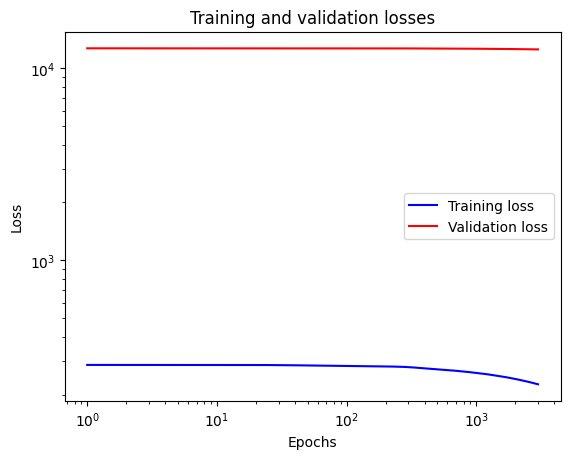

In [13]:
###############################################################################
#                    Plot the history    
###############################################################################
     
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.figure()
plt.plot(epochs, loss,'b', label='Training loss')
plt.plot(epochs, val_loss,'r', label='Validation loss')
plt.title('Training and validation losses')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.xscale('log')
plt.yscale('log')
plt.legend()
plt.savefig('loss_curves4.png')
plt.show()

313/313 [==============================] - 0s 1ms/step


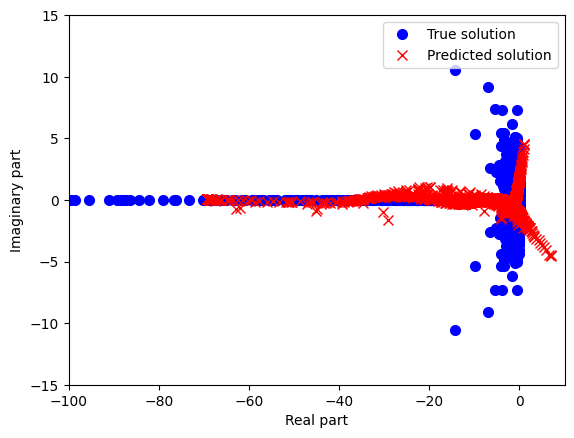

In [14]:
###############################################################################
#                   test the model prediction performance
###############################################################################
# load the best model we get from training
network.load_weights(filepath)


dataYtrain_prediction = network.predict(dataXtrain)
dataYval_prediction = network.predict(dataXval)

# generate the prediction output to make comparison
dataYtest_prediction = network.predict(dataXtest)

# extract the data
x1real_test[i,0] = np.real(x1)
x1imag_test[i,0] = np.imag(x1)
x2real_test[i,0] = np.real(x2)
x2imag_test[i,0] = np.imag(x2)

x1real_test_prediction = np.zeros(shape=(sample_number,1))
x1imag_test_prediction = np.zeros(shape=(sample_number,1))
x2real_test_prediction = np.zeros(shape=(sample_number,1))
x2imag_test_prediction = np.zeros(shape=(sample_number,1))
 
for i in range(sample_number):
    x1real_test_prediction[i,0] = dataYtest_prediction[i,0]
    x1imag_test_prediction[i,0] = dataYtest_prediction[i,1]
    x2real_test_prediction[i,0] = dataYtest_prediction[i,2]
    x2imag_test_prediction[i,0] = dataYtest_prediction[i,3]
     
plt.plot(x1real_test, x1imag_test, 'bo', markersize=7, label='True solution')    
plt.plot(x2real_test, x2imag_test, 'bo', markersize=7) 
plt.plot(x1real_test_prediction, x1imag_test_prediction, 'rx', markersize=7, label='Predicted solution')    
plt.plot(x2real_test_prediction, x2imag_test_prediction, 'rx', markersize=7)    
plt.xlabel('Real part')
plt.ylabel('Imaginary part')
plt.xlim(-100, 10)
plt.ylim(-15, 15)
plt.legend()
plt.savefig('identified4.png')
plt.show()